In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Data Exploration

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/GitHub/(Project Pro)NLP/Canva_reviews.xlsx')
data = pd.read_excel('/content/drive/My Drive/Canva_reviews.xlsx')
# #When done,

Mounted at /content/drive


In [3]:
data.shape

(1500, 13)

In [4]:
data.head(3)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files


In [5]:
data.loc[13, "review"]

'Unable to save my work. Nothing works :('

In [6]:
data.loc[13, "Sentiment"]

'Negative'

In [7]:
data.loc[1495, "review"]

'Absolutely amazing and a lifesaver for teachers.'

In [8]:
data.loc[1495, "Sentiment"]

'Positive'

### Bar plot of 'Sentiment'

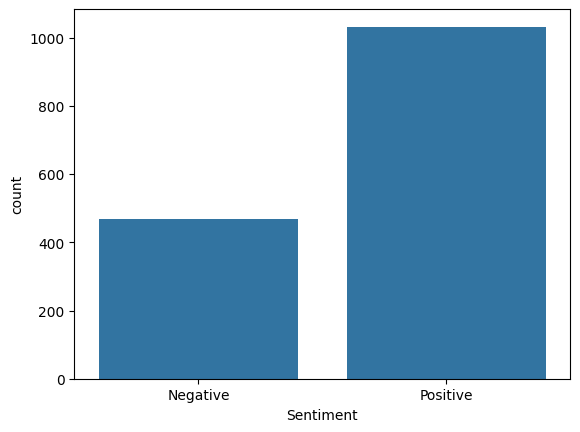

In [9]:
sns.countplot(x="Sentiment", data=data)
plt.show()

In [10]:
data["Sentiment"].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

In [11]:
468/(1032+468)

0.312

### Bar plot of 'score'

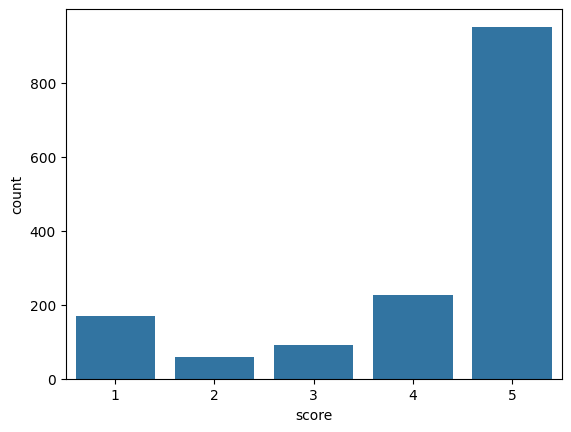

In [12]:
sns.countplot(x="score", data=data)
plt.show()

### Check relationship between 'score' and 'Sentiment'

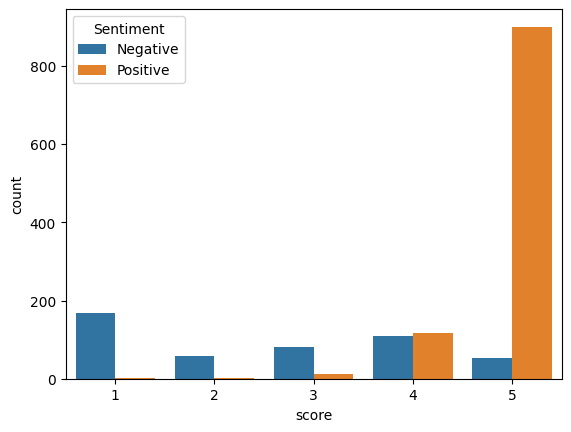

In [13]:
sns.countplot(x="score", data=data, hue="Sentiment")
plt.show()

### Find the length of each 'review'

In [14]:
data["len"] = data["review"].apply(len)

In [15]:
data["len"].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: len, dtype: float64

### Plot the histogram of 'len'

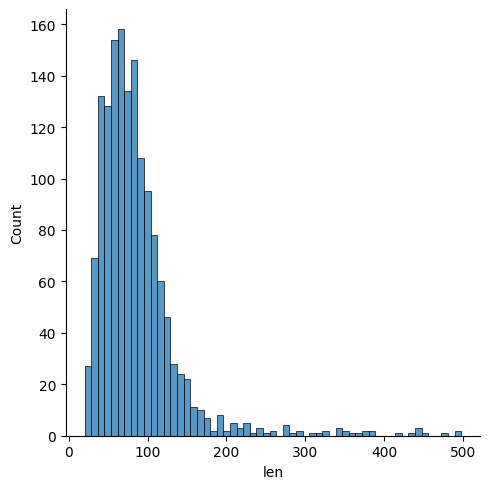

In [16]:
sns.displot(data["len"])
plt.show()

### Plot the distribution of 'len' for different 'Sentiment' types

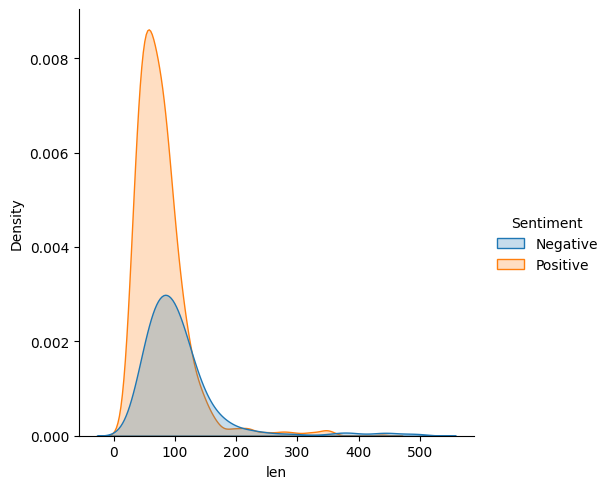

In [17]:
sns.displot(data=data, x="len", hue="Sentiment", kind="kde", fill=True)
plt.show()

# Tokenization

In [18]:
data = data[["review", "Sentiment"]]

In [19]:
data.loc[13, "review"]

'Unable to save my work. Nothing works :('

In [20]:
sent_tokenize(data.loc[13,"review"])

['Unable to save my work.', 'Nothing works :(']

In [21]:
data.loc[1495, "review"]

'Absolutely amazing and a lifesaver for teachers.'

In [22]:
sent_tokenize(data.loc[1495, "review"])

['Absolutely amazing and a lifesaver for teachers.']

In [23]:
word_tokenize(data.loc[13, "review"])

['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '(']

In [24]:
word_tokenize(data.loc[1495, "review"])

['Absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

### Convert text to lower case

In [25]:
reviews = list(data["review"])

In [26]:
len(reviews)

1500

In [27]:
reviews[13]

'Unable to save my work. Nothing works :('

In [28]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

In [29]:
reviews[1495].lower()

'absolutely amazing and a lifesaver for teachers.'

In [30]:
reviews_lower = [r.lower() for r in reviews]

In [31]:
reviews_lower[13]

'unable to save my work. nothing works :('

In [32]:
#reviews_lower = []
#for r in reviews:
#    reviews_lower.append(r.lower())

In [33]:
# when you apply a tokenizer on some text, it will give you a list
# so what we expect here is a list of list.
tokens = [word_tokenize(r) for r in reviews_lower]

In [34]:
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

In [35]:
tokens[1495]

['absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

In [36]:
len(tokens)

1500

# Stopwords removal

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
sw = stopwords.words('english')

In [39]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
tokens = [[word for word in t if word not in sw] for t in tokens]

In [41]:
tokens[13]

['unable', 'save', 'work', '.', 'nothing', 'works', ':', '(']

In [42]:
reviews[13]

'Unable to save my work. Nothing works :('

In [43]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers', '.']

In [44]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

### Remove punctuations

In [45]:
# remove any punctuation marks
tokenizer = RegexpTokenizer(r'\w+')

In [46]:
tokenizer.tokenize("wasn't")

['wasn', 't']

In [47]:
t = tokenizer.tokenize("wasn't")

In [48]:
"".join(t)

'wasnt'

In [49]:
tokenizer.tokenize(":")

[]

In [50]:
tokens = [["".join(tokenizer.tokenize(word)) for word in t
           if len(tokenizer.tokenize(word))>0] for t in tokens]

In [51]:
tokens[13]

['unable', 'save', 'work', 'nothing', 'works']

In [52]:
reviews[13]

'Unable to save my work. Nothing works :('

In [53]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers']

In [54]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

# Stemming

Stemming refers to the process of reducing a word to its word stem that affixes to suffixes and prefixes or the roots. It is a useful tool for reducing the dimensionality of text data and transforming words into a common format for processing.

The Lancaster Stemming Algorithm is known to be more aggressive than other stemming algorithms, such as the Porter and Snowball algorithms, and therefore may produce less accurate results. However, it is also faster and can be useful for reducing the dimensionality of text data in certain NLP tasks.

In [55]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [56]:
porter.stem("teachers")

'teacher'

In [57]:
lancaster.stem("teachers")

'teach'

In [58]:
porter.stem("absolutely")

'absolut'

In [59]:
lancaster.stem("absolutely")

'absolv'

In [60]:
tokens = [[porter.stem(word) for word in t] for t in tokens]

In [61]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [62]:
reviews[13]

'Unable to save my work. Nothing works :('

In [63]:
tokens[1495]

['absolut', 'amaz', 'lifesav', 'teacher']

In [64]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

# Word count distribution

In [65]:
flat_tokens = [word for t in tokens for word in t]

In [66]:
len(flat_tokens)

13782

In [67]:
flat_tokens[:10]

['overal', 's', 'realli', 'amaz', 'app', 've', 'use', 'past', '5', 'year']

these tokens are going to be our features!

In [68]:
counts = Counter(flat_tokens)

In [69]:
counts

Counter({'overal': 12,
         's': 240,
         'realli': 129,
         'amaz': 110,
         'app': 932,
         've': 32,
         'use': 474,
         'past': 10,
         '5': 24,
         'year': 13,
         'howev': 6,
         'one': 70,
         'issu': 35,
         'though': 10,
         'want': 47,
         'get': 57,
         'address': 2,
         'sinc': 9,
         'think': 17,
         'last': 7,
         'mani': 91,
         'text': 36,
         'blur': 3,
         'zoom': 6,
         'pixel': 1,
         'thought': 8,
         'occur': 2,
         'mobil': 25,
         'also': 41,
         'present': 24,
         'websit': 7,
         'pleas': 66,
         'fix': 40,
         'still': 32,
         'rememb': 2,
         'time': 104,
         'export': 5,
         'high': 12,
         'definit': 10,
         'love': 220,
         'experi': 20,
         'thank': 84,
         'hey': 2,
         'ye': 3,
         'gave': 10,
         'star': 40,
         'rate': 12,
  

In [70]:
len(counts)

1720

In [71]:
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184)]

# Bag of Words

- Bag-of-words is a simple technique that counts the number of times each word appears in a document.

In [90]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [73]:
" ".join(tokens[13])

'unabl save work noth work'

In [74]:
clean_reviews = [" ".join(t) for t in tokens]

In [75]:
clean_reviews[13]

'unabl save work noth work'

In [76]:
clean_reviews[1495]

'absolut amaz lifesav teacher'

In [77]:
clean_reviews[:10]

['overal s realli amaz app ve use past 5 year howev one issu though want get address sinc think issu last mani year text blur zoom s pixel thought issu occur mobil app howev also present websit pleas fix still rememb time export high definit text love experi thank',
 'hey ye gave 5 star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank',
 'canva use good app recent ve face issu save file want file save png format get save jpg format moreov want file save get stuck download screen call magic happen ll get 1 star hope fix app soon thank',
 's brilliant app one problem m edit post doubl tap photo reposit start zoom photo 8 time 10 app crash restart lg g5 se sometim ve go desktop version pc reposit zoom photo want resum edit back mobil',
 'great app use make bt meme recent updat m abl chang font style edit o

In [78]:
vect = CountVectorizer(binary=True, min_df=5)

In [91]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer

In [79]:
X = vect.fit_transform(clean_reviews)

In [80]:
X.shape

(1500, 413)

- we have 1500 data points/reviews, out of those 1500 only 413 unique tokens appeared in more than 5 documents
- this is a sparse matrix. we will need to convert it into a dense matrix in a minute.

### Unique words in the vocabulary

In [92]:
len(vect.vocabulary_)

413

### Convert the sparse matrix to array

In [82]:
type(X)

scipy.sparse._csr.csr_matrix

In [93]:
X_a = X.toarray()

In [94]:
X_a.shape

(1500, 413)

In [95]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [96]:
X_a[13,:].sum()

4

In [97]:
clean_reviews[13]

'unabl save work noth work'

In [99]:
vect.get_feature_names().index("unabl")

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
X_a[13,370]

In [ ]:
vect.get_feature_names().index("work")

In [ ]:
X_a[13,401]

In [100]:
data.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive
2,Canva used to be a good app! But recently I've...,Negative
3,"It's a brilliant app, but I have just one prob...",Negative
4,This was such a great app. I used to make BTS ...,Negative


In [101]:
data["Sentiment"] = data["Sentiment"].apply(lambda x: 1 if x=="Positive" else 0)

In [102]:
y = data["Sentiment"]

### Split the dataset into train and test

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

### Build a Logistic Regression model

In [104]:
model = LogisticRegression()

In [105]:
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
train_pred = model.predict(X_train)

In [107]:
accuracy_score(y_train, train_pred)

0.9608333333333333

In [108]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.89

### Save both the vectorizer and the model

In [110]:
with open("Output/binary_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

FileNotFoundError: [Errno 2] No such file or directory: 'Output/binary_count_vect.pkl'

### Bag of words without binary

In [111]:
vect = CountVectorizer(min_df=5)
X = vect.fit_transform(clean_reviews)

In [112]:
X_a = X.toarray()

In [113]:
clean_reviews[13]

'unabl save work noth work'

In [ ]:
# vect.get_feature_names().index("work")

In [ ]:
X_a[13,:]

In [ ]:
X_a[13,401]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [117]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9566666666666667
Test Accuracy:0.8833333333333333


### Save both the vectorizer and the model again

In [118]:
with open("Output/count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

FileNotFoundError: [Errno 2] No such file or directory: 'Output/count_vect.pkl'

# N-grams

In [119]:
vect = CountVectorizer(min_df=5, ngram_range=(1,3))
X = vect.fit_transform(clean_reviews)

In [120]:
X.shape

(1500, 666)

In [121]:
vect.vocabulary_

{'overal': 425,
 'realli': 476,
 'amaz': 19,
 'app': 29,
 've': 625,
 'use': 602,
 'past': 428,
 'year': 661,
 'howev': 298,
 'one': 415,
 'issu': 314,
 'though': 579,
 'want': 633,
 'get': 257,
 'sinc': 519,
 'think': 578,
 'last': 326,
 'mani': 372,
 'text': 573,
 'zoom': 665,
 'thought': 580,
 'mobil': 385,
 'also': 17,
 'present': 455,
 'websit': 638,
 'pleas': 446,
 'fix': 237,
 'still': 539,
 'time': 582,
 'export': 219,
 'high': 293,
 'definit': 155,
 'love': 350,
 'experi': 217,
 'thank': 574,
 'realli amaz': 477,
 'amaz app': 20,
 'app ve': 66,
 've use': 628,
 'pleas fix': 447,
 'gave': 255,
 'star': 537,
 'rate': 472,
 'deserv': 156,
 'desktop': 164,
 'version': 629,
 'satisfi': 499,
 'android': 23,
 'develop': 166,
 'beauti': 86,
 'liter': 335,
 'find': 231,
 'almost': 14,
 'everyth': 212,
 'need': 395,
 'best': 89,
 'even': 206,
 'without': 645,
 'premium': 453,
 'featur': 227,
 'provid': 466,
 'us': 601,
 'lot': 346,
 'gave star': 256,
 'desktop version': 165,
 'canva': 1

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [123]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [124]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9716666666666667
Test Accuracy:0.8933333333333333


### Save both the vectorizer and the model

In [125]:
with open("Output/n_gram.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/n_gram_lr.pkl", "wb") as f:
    pickle.dump(model, f)

FileNotFoundError: [Errno 2] No such file or directory: 'Output/n_gram.pkl'

# TF-IDF

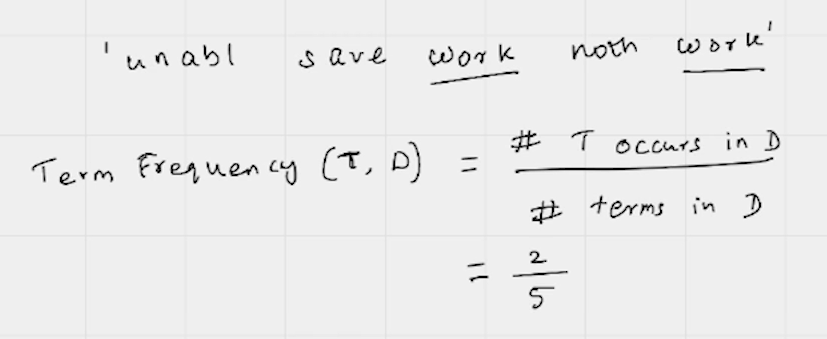

Inverse document frequency
- TF alone is not sufficient as the word can be a common word and occurs many times in many documents.
- so we define a term called Inverse Document Frequency, IDF, which is given by:
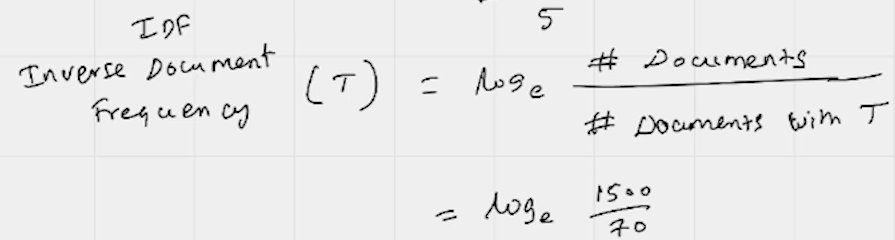






The final score we are looking for here is TF-IDF, which is the product of TF and IDF

In [126]:
vect = TfidfVectorizer(min_df=5)

In [127]:
X = vect.fit_transform(clean_reviews)

In [128]:
X.shape

(1500, 413)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.935
Test Accuracy:0.8766666666666667


### Save both the vectorizer and the model

In [132]:
with open("Output/tf-idf.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/tf-idf_lr.pkl", "wb") as f:
    pickle.dump(model, f)

FileNotFoundError: [Errno 2] No such file or directory: 'Output/tf-idf.pkl'

# Predictions for new reviews

In [133]:
# Sample test reviews
test_review_1 = '''this is a truly amazing app , best for those who havw
content but don't know how to express it in a good and shareable manner.
Thanks Team Canva for such a great app.'''
test_review_2 = '''Its the worst app ever I save my design lts not save'''

### Load the best model (n-gram) and its vectorizer

In [134]:
vect = pickle.load(open("Output/n_gram.pkl", "rb"))
model = pickle.load(open("Output/n_gram_lr.pkl", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'Output/n_gram.pkl'

### Convert the reivews to a batch of one record

In [135]:
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

### Convert the text to lower case

In [136]:
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

### Tokenize the text

In [137]:
tokens_1 = [word_tokenize(r) for r in test_review_1]
tokens_2 = [word_tokenize(r) for r in test_review_2]

### Remove stopwords

In [138]:
tokens_1 = [[word for word in t if word not in sw] for t in tokens_1]
tokens_2 = [[word for word in t if word not in sw] for t in tokens_2]

### Remove punctuations

In [139]:
tokens_1 = [["".join(tokenizer.tokenize(word)) for word in t
             if len(tokenizer.tokenize(word))>0] for t in tokens_1]
tokens_2 = [["".join(tokenizer.tokenize(word)) for word in t
             if len(tokenizer.tokenize(word))>0] for t in tokens_2]

### Stemming

In [140]:
tokens_1 = [[porter.stem(word) for word in t] for t in tokens_1]
tokens_2 = [[porter.stem(word) for word in t] for t in tokens_2]

In [141]:
tokens_1

[['truli',
  'amaz',
  'app',
  'best',
  'havw',
  'content',
  'nt',
  'know',
  'express',
  'good',
  'shareabl',
  'manner',
  'thank',
  'team',
  'canva',
  'great',
  'app']]

In [142]:
test_review_1

["this is a truly amazing app , best for those who havw\ncontent but don't know how to express it in a good and shareable manner.\nthanks team canva for such a great app."]

In [143]:
tokens_2

[['worst', 'app', 'ever', 'save', 'design', 'lt', 'save']]

In [144]:
test_review_2

['its the worst app ever i save my design lts not save']

### Join the tokens to form a sentence

In [145]:
clean_review_1 = [" ".join(review) for review in tokens_1]
clean_review_2 = [" ".join(review) for review in tokens_2]

### Transform the text using vectorizer and make predictions

### Note: Prediction probability for postive class is high for the first test review

In [146]:
X_test = vect.transform(clean_review_1)

In [147]:
X_test.shape

(1, 413)

In [148]:
model.predict_proba(X_test)

array([[0.0795794, 0.9204206]])

In [149]:
model.predict(X_test)

array([1])

### Note: Prediction probability for negative class is high for the second test review

In [150]:
X_test = vect.transform(clean_review_2)

In [151]:
X_test.shape

(1, 413)

In [152]:
model.predict_proba(X_test)

array([[0.69165233, 0.30834767]])

In [153]:
model.predict(X_test)

array([0])